# Import Data Set

In [1]:
import pandas as pd
data1 = pd.read_csv("C:/Users/khann/OneDrive/Desktop/excel r assignments/delivery_time.csv")
data1.head(24)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [2]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [3]:
data= data1.rename({'Delivery Time': 'DT','Sorting Time':'ST'}, axis=1)

In [4]:
data.head()

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# Correlation

In [5]:
data.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


C:\Users\khann\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DT', ylabel='Density'>

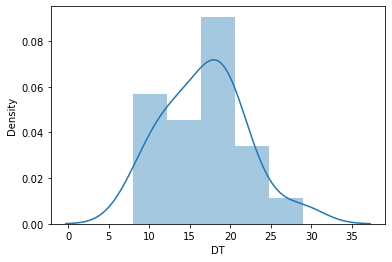

In [6]:
import seaborn as sns
sns.distplot(data['DT'])

C:\Users\khann\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ST', ylabel='Density'>

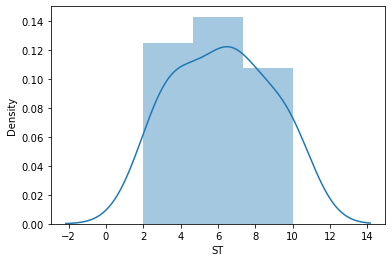

In [7]:
import seaborn as sns
sns.distplot(data['ST'])

Fitting a Linear Regression Model

In [8]:
import statsmodels.formula.api as smf
model = smf.ols("DT~ST",data = data).fit()

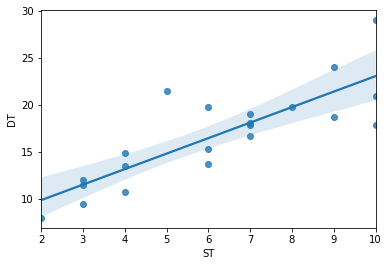

In [9]:
sns.regplot(x="ST", y="DT", data=data);

In [10]:
#Coefficients
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [11]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept    3.823349
ST           6.387447
dtype: float64 
 Intercept    0.001147
ST           0.000004
dtype: float64


In [12]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

<AxesSubplot:>

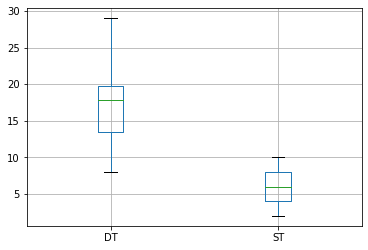

In [13]:
data.boxplot(column=['DT', 'ST'])

In [14]:
data[data.duplicated()].shape

(0, 2)

In [15]:
data[data.duplicated()]

,DT,ST


In [16]:
data_cleaned1=data.drop_duplicates()

In [17]:
data_cleaned1

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [18]:
data_cleaned1.isnull().sum()

DT    0
ST    0
dtype: int64

<AxesSubplot:>

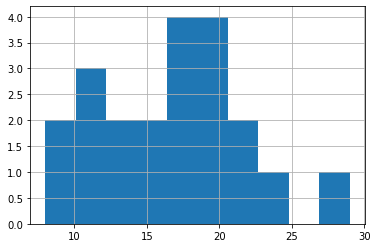

In [19]:
data_cleaned1['DT'].hist()

# Predict for new data point

In [20]:
#Predict for 200 and 300 daily circulation
newdata=pd.Series([10,4])

In [21]:
data_pred=pd.DataFrame(newdata,columns=['ST'])

In [22]:
model.predict(data_pred)

0    23.072933
1    13.178814
dtype: float64

In [23]:
newdata=pd.Series([5,3])

In [24]:
data_pred=pd.DataFrame(newdata,columns=['ST'])

In [25]:
model.predict(data_pred)

0    14.827833
1    11.529794
dtype: float64